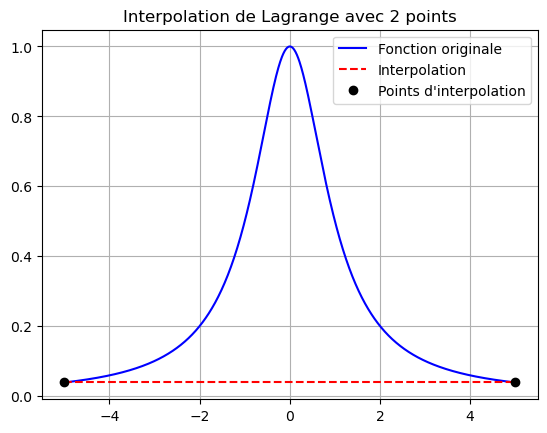

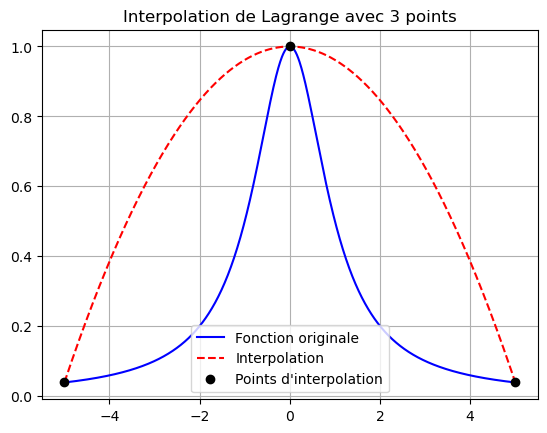

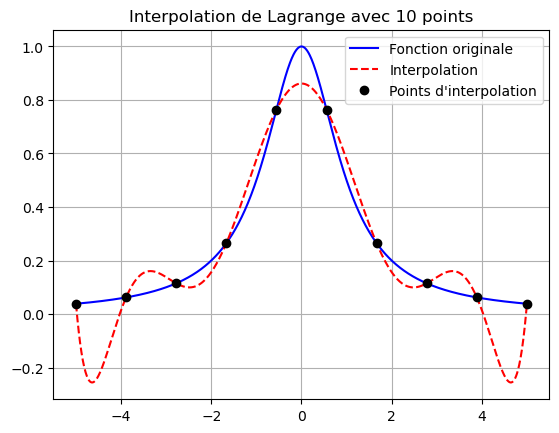

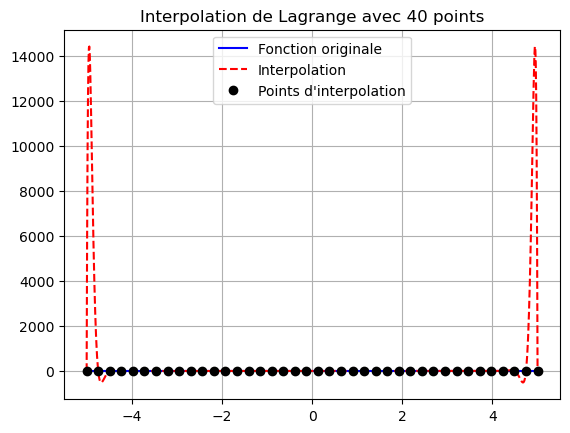

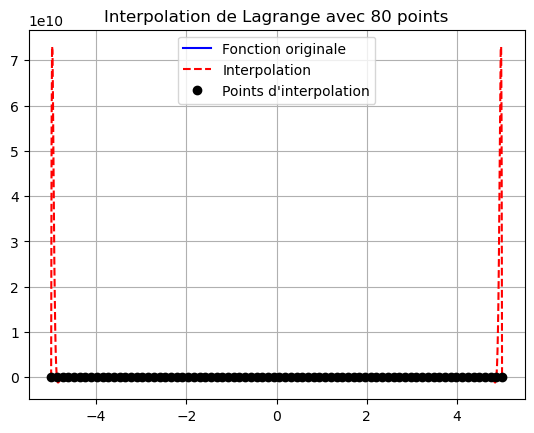

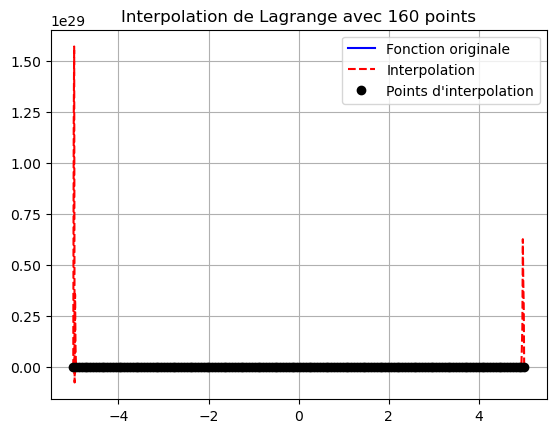

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction qui réalise l'interpolation de Lagrange pour un point x donné
def lagrange_interpolation(x_points, y_points, x):
    n = len(x_points)       # Nombre de points donnés
    result = 0.0            # Résultat de l'interpolation initialisé à 0

    # On construit le polynôme de Lagrange en sommant les termes L_i(x)*y_i
    for i in range(n):
        term = y_points[i]  # Valeur de y_i
        for j in range(n):
            if j != i:
                # Calcul du L_i(x), produit des (x - x_j)/(x_i - x_j)
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term      # Ajout du terme au résultat final

    return result           # Retourne la valeur interpolée en x

# Fonction pour tracer et comparer la fonction réelle et son interpolation
def plot_lagrange_comparison(n_points, f):
    # Création de n_points espacés régulièrement entre -5 et 5
    x_points = np.linspace(-5, 5, n_points)
    y_points = f(x_points)  # Calcul des y correspondant à chaque x (f(x))

    # On prend beaucoup plus de points pour dessiner une courbe lisse
    x = np.linspace(-5, 5, 1000)
    y_true = f(x)  # Valeurs réelles de la fonction à interpoler

    # Calcul des valeurs interpolées sur les mêmes x
    y_lagrange = [lagrange_interpolation(x_points, y_points, xi) for xi in x]

    # Tracé de la fonction réelle
    plt.plot(x, y_true, 'b-', label='Fonction originale')
    # Tracé de l'interpolation de Lagrange
    plt.plot(x, y_lagrange, 'r--', label='Interpolation')
    # Tracé des points d'interpolation (les n_points utilisés)
    plt.plot(x_points, y_points, 'ko', label='Points d\'interpolation')

    # Amélioration du graphique
    plt.grid(True)
    plt.legend()
    plt.title(f'Interpolation de Lagrange avec {n_points} points')
    plt.show()

# Fonction que l'on souhaite approximer : f(x) = 1 / (1 + x^2)
# C'est une fonction 
7=bien connue qui illustre bien le problème de Runge
f = lambda x: 1 / (1 + x**2)

# On teste l'interpolation avec différents nombres de points
# Plus il y a de points, plus le résultat est précis... mais attention !
# Trop de points peut faire apparaître des oscillations (problème de Runge)
for n in [2, 3, 10, 40, 80, 160]:
    plot_lagrange_comparison(n, f)
